In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
#import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [2]:
df = pd.read_csv('imdb_top_1000_cleaned.csv')
df.isna().sum()

Series_Title      0
Released_Year     0
Certificate      46
Runtime           0
Genre             0
IMDB_Rating       0
Overview          0
Meta_score       81
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
No_of_Votes       0
Gross             0
dtype: int64

In [3]:
df= df.dropna()
df = df.reset_index()
df = df.drop(columns = ['index','Overview'],axis = 1)


In [4]:
df['Gross'] = df['Gross'].str.replace(',','').astype(int)

df['Runtime'] = df['Runtime'].str.replace('min', '').astype(int)

good_df = df[df['IMDB_Rating'] >= 8.4]
#good_df

drama_df = df[df['Genre'] == 'Drama']
#drama_df

In [5]:
df.dtypes
#drama_df = drama_df.assign(Certificate)
drama_df.count(axis=0)

Series_Title      object
Released_Year      int64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross              int64
dtype: object

Series_Title     58
Released_Year    58
Certificate      58
Runtime          58
Genre            58
IMDB_Rating      58
Meta_score       58
Director         58
Star1            58
Star2            58
Star3            58
Star4            58
No_of_Votes      58
Gross            58
dtype: int64

In [6]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

# correl = subset_data.corr()
correl = df.corr()

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data1=[trace]
plotly.offline.iplot(data1, filename='basic-heatmap')

In [7]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc1 = StandardScaler()
sc2 = StandardScaler()
df.dtypes

Series_Title      object
Released_Year      int64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross              int64
dtype: object

In [8]:
df_sub = df[['Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes','Gross']].copy()

good_df_sub = good_df[['Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes','Gross']].copy()

drama_df = drama_df[['Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes','Gross','Certificate']].copy()
df_sub.head()

drama_df = pd.get_dummies(drama_df, drop_first=False)
df_sub = pd.DataFrame(sc.fit_transform(df_sub), columns = df_sub.columns, index = df_sub.index)

good_df_sub = pd.DataFrame(sc1.fit_transform(good_df_sub), columns = good_df_sub.columns, index = good_df_sub.index)
print(df_sub)

drama_df = pd.DataFrame(sc1.fit_transform(drama_df), columns = drama_df.columns, index = drama_df.index)
#print(df_sub)

df_sub2 = df_sub[['IMDB_Rating','Meta_score']].copy()


,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1994,142,9.30,80.00,2343110,28341469
1,1972,175,9.20,100.00,1620367,134966411
2,2008,152,9.00,84.00,2303232,534858444
3,1974,202,9.00,90.00,1129952,57300000
4,1957,96,9.00,96.00,689845,4360000


     Released_Year  Runtime  IMDB_Rating  Meta_score  No_of_Votes  Gross
0            -0.09     0.71         4.65        0.23         5.62  -0.44
1            -1.28     1.98         4.31        1.84         3.57   0.49
2             0.66     1.09         3.63        0.55         5.51   3.97
3            -1.17     3.03         3.63        1.04         2.19  -0.18
4            -2.09    -1.07         3.63        1.52         0.94  -0.65
..             ...      ...          ...         ...          ...    ...
709          -1.33     1.29        -1.15       -0.01        -0.92  -0.68
710          -1.39     0.78        -1.15       -2.19        -0.88  -0.67
711          -1.55    -1.77        -1.15       -0.98        -0.54   0.55
712          -1.71    -1.42        -1.15        1.52        -0.89  -0.56
713          -2.30    -0.22        -1.15        0.63        -0.88  -0.42

[714 rows x 6 columns]


In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 6, 
           init = 'k-means++', 
           n_init = 10, 
           max_iter = 500, 
           random_state = 50)
data_km = pd.DataFrame(km.fit_predict(df_sub2), index = df_sub2.index)

km1 = KMeans(n_clusters = 6, 
           init = 'k-means++', 
           n_init = 10, 
           max_iter = 500, 
           random_state = 50)
data_km1 = pd.DataFrame(km1.fit_predict(good_df_sub), index = good_df_sub.index)

km2 = KMeans(n_clusters = 3, 
           init = 'k-means++', 
           n_init = 10, 
           max_iter = 500, 
           random_state = 50)
data_km2 = pd.DataFrame(km2.fit_predict(drama_df), index = drama_df.index)

In [10]:
data_km.rename(columns = {0:'cluster'}, inplace = True)
data_km = data_km.merge(df[['Series_Title','Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes','Gross']], left_index = True, right_index = True)
data_km.head()

data_km1.rename(columns = {0:'cluster'}, inplace = True)
data_km1 = data_km1.merge(df[['Series_Title','Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes','Gross','Director','Star1']], left_index = True, right_index = True)
data_km1.head()

data_km2.rename(columns = {0:'cluster'}, inplace = True)
data_km2 = data_km2.merge(df[['Series_Title','Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes','Gross','Director','Star1']], left_index = True, right_index = True)
data_km2.head()

,cluster,Series_Title,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,3,The Shawshank Redemption,1994,142,9.30,80.00,2343110,28341469
1,3,The Godfather,1972,175,9.20,100.00,1620367,134966411
2,3,The Dark Knight,2008,152,9.00,84.00,2303232,534858444
3,3,The Godfather: Part II,1974,202,9.00,90.00,1129952,57300000
4,3,12 Angry Men,1957,96,9.00,96.00,689845,4360000


,cluster,Series_Title,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Director,Star1
0,2,The Shawshank Redemption,1994,142,9.30,80.00,2343110,28341469,Frank Darabont,Tim Robbins
1,2,The Godfather,1972,175,9.20,100.00,1620367,134966411,Francis Ford Coppola,Marlon Brando
2,2,The Dark Knight,2008,152,9.00,84.00,2303232,534858444,Christopher Nolan,Christian Bale
3,2,The Godfather: Part II,1974,202,9.00,90.00,1129952,57300000,Francis Ford Coppola,Al Pacino
4,3,12 Angry Men,1957,96,9.00,96.00,689845,4360000,Sidney Lumet,Henry Fonda


,cluster,Series_Title,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Director,Star1
0,2,The Shawshank Redemption,1994,142,9.30,80.00,2343110,28341469,Frank Darabont,Tim Robbins
9,2,Fight Club,1999,139,8.80,66.00,1854740,37030102,David Fincher,Brad Pitt
17,2,One Flew Over the Cuckoo's Nest,1975,133,8.70,83.00,918088,112000000,Milos Forman,Jack Nicholson
36,0,American History X,1998,119,8.50,62.00,1034705,6719864,Tony Kaye,Edward Norton
48,2,Capharnaüm,2018,126,8.40,75.00,62635,1661096,Nadine Labaki,Zain Al Rafeea


In [11]:
pd.set_option('display.max_rows', None)
#data_km.sort_values(by = ['cluster'])

pd.set_option('display.max_rows', None)
#data_km1.sort_values(by = ['cluster'])

pd.set_option('display.max_rows', None)
#data_km2.sort_values(by = ['cluster'])

In [12]:
print(data_km.loc[data_km['Series_Title'] == 'Rear Window'])
print(data_km.loc[data_km['Series_Title'] == 'Citizen Kane'])

print(data_km1.loc[data_km1['Series_Title'] == 'Fight Club'])

print(data_km1.loc[data_km1['Director'] == 'Alfred Hitchcock'])

print(data_km2.loc[data_km['Series_Title'] == 'The Help'])

    cluster Series_Title  Released_Year  Runtime  IMDB_Rating  Meta_score  \
67        3  Rear Window           1954      112         8.40      100.00   

    No_of_Votes     Gross  
67       444074  36764313  
     cluster  Series_Title  Released_Year  Runtime  IMDB_Rating  Meta_score  \
100        1  Citizen Kane           1941      119         8.30      100.00   

     No_of_Votes    Gross  
100       403351  1585634  
   cluster Series_Title  Released_Year  Runtime  IMDB_Rating  Meta_score  \
9        5   Fight Club           1999      139         8.80       66.00   

   No_of_Votes     Gross       Director      Star1  
9      1854740  37030102  David Fincher  Brad Pitt  
    cluster Series_Title  Released_Year  Runtime  IMDB_Rating  Meta_score  \
44        3       Psycho           1960      109         8.50       97.00   
67        3  Rear Window           1954      112         8.40      100.00   

    No_of_Votes     Gross          Director            Star1  
44       604211  320

In [13]:
print(data_km.loc[data_km['IMDB_Rating'] >= 8.7])

    cluster                                       Series_Title  Released_Year  \
0         3                           The Shawshank Redemption           1994   
1         3                                      The Godfather           1972   
2         3                                    The Dark Knight           2008   
3         3                             The Godfather: Part II           1974   
4         3                                       12 Angry Men           1957   
5         3      The Lord of the Rings: The Return of the King           2003   
6         3                                       Pulp Fiction           1994   
7         3                                   Schindler's List           1993   
8         3                                          Inception           2010   
9         3                                         Fight Club           1999   
10        3  The Lord of the Rings: The Fellowship of the Ring           2001   
11        3                 

In [14]:
plot_data = []
for clus in set(data_km['cluster']):
    df = data_km[data_km['cluster'] == clus]
    plot_data.append(go.Scatter(x= df['IMDB_Rating'], y= df['Meta_score'], text=df["Series_Title"], name = 'cluster ' + str(clus), mode = 'markers'))

layout = go.Layout(xaxis = dict(title='IMDBrating'), yaxis = dict(title= 'Meta_score'), 
                   title = 'Clustering')
fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)
    

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

KMeans(max_iter=500, n_clusters=7, random_state=50)

KMeans(max_iter=500, random_state=50)

KMeans(max_iter=500, n_clusters=9, random_state=50)

KMeans(max_iter=500, n_clusters=10, random_state=50)

KMeans(max_iter=500, n_clusters=11, random_state=50)

KMeans(max_iter=500, n_clusters=12, random_state=50)

KMeans(max_iter=500, n_clusters=13, random_state=50)

KMeans(max_iter=500, n_clusters=14, random_state=50)

KMeans(max_iter=500, n_clusters=15, random_state=50)

KMeans(max_iter=500, n_clusters=16, random_state=50)

KMeans(max_iter=500, n_clusters=17, random_state=50)

KMeans(max_iter=500, n_clusters=18, random_state=50)

KMeans(max_iter=500, n_clusters=19, random_state=50)

KMeans(max_iter=500, n_clusters=20, random_state=50)

KMeans(max_iter=500, n_clusters=21, random_state=50)

KMeans(max_iter=500, n_clusters=22, random_state=50)

KMeans(max_iter=500, n_clusters=23, random_state=50)

KMeans(max_iter=500, n_clusters=24, random_state=50)

KMeans(max_iter=500, n_clusters=25, random_state=50)

KMeans(max_iter=500, n_clusters=26, random_state=50)

KMeans(max_iter=500, n_clusters=27, random_state=50)

KMeans(max_iter=500, n_clusters=28, random_state=50)

KMeans(max_iter=500, n_clusters=29, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

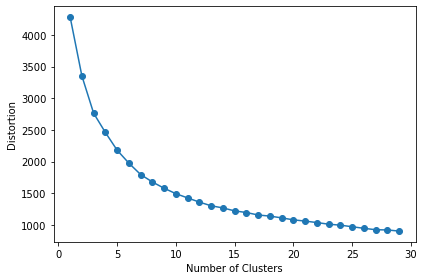

In [15]:
distortions = []
for i in range(1, 30): 
    km = KMeans(n_clusters = i, 
           init = 'k-means++', # this initializes by placing the initial ones randomly and uniformly in grid
           n_init = 10, 
           max_iter = 500, 
           # tol = 1e-04, 
           random_state = 50)
    km.fit(df_sub)
    distortions.append(km.inertia_)
plt.plot(range(1,30), distortions, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = None,  
    distance_threshold = 8.0,  
           affinity = 'euclidean', 
           linkage = 'complete')
data_ac = pd.DataFrame(ac.fit_predict(df_sub), index = df_sub.index)
#data_ac.head()
#data_ac

In [17]:
data_ac.rename(columns = {0:'cluster'}, inplace = True)
data_ac = data_ac.merge(df[['Series_Title','Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes','Gross']], left_index = True, right_index = True)
#data_ac

In [18]:
data_ac.rename(columns = {0:'cluster'}, inplace = True)
pd.set_option('display.max_rows', None)
data_ac.sort_values(by = ['cluster'])

,cluster,Series_Title,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
309,0,Captain Fantastic,2016,118,7.90,72.00,189400,5875006
578,0,Miller's Crossing,1990,115,7.70,66.00,125822,5080409
581,0,The Last Emperor,1987,163,7.70,76.00,94326,43984230
582,0,Empire of the Sun,1987,153,7.70,62.00,115677,22238696
584,0,Blue Velvet,1986,120,7.70,76.00,181285,8551228
585,0,The Purple Rose of Cairo,1985,82,7.70,75.00,47102,10631333
588,0,Star Trek II: The Wrath of Khan,1982,113,7.70,67.00,112704,78912963
594,0,Blazing Saddles,1974,93,7.70,73.00,125993,119500000
607,0,Searching,2018,102,7.60,71.00,140840,26020957
612,0,The Peanut Butter Falcon,2019,97,7.60,70.00,66346,13122642
